In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('raw 2 tweets climate change.csv')

In [3]:
df.head()

,Unnamed: 0,Tweets
0,0,🤝✊🏽👏🏽👏🏽👏🏽👏🏽👏🏽👏🏽👏🏽\nWe don’t have “Democrat” or...
1,1,Yes! 🌎🌍🌏\n#ParisClimateAgreement https://t.co/...
2,2,Official back in - Paris Climate Agreement #Pa...
3,3,US Formally Rejoins Paris Climate Agreement #F...
4,4,"Thank you, @Gina_McCarthy for rejoining the Pa..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21779 entries, 0 to 21778
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  21779 non-null  int64 
 1   Tweets      21779 non-null  object
dtypes: int64(1), object(1)
memory usage: 340.4+ KB


In [5]:
df.isnull().sum()

Unnamed: 0    0
Tweets        0
dtype: int64

In [6]:
df.columns

Index(['Unnamed: 0', 'Tweets'], dtype='object')

In [7]:
df.rename(columns = {'Tweets':'text'}, inplace = True)
df.columns
df.head()

,Unnamed: 0,text
0,0,🤝✊🏽👏🏽👏🏽👏🏽👏🏽👏🏽👏🏽👏🏽\nWe don’t have “Democrat” or...
1,1,Yes! 🌎🌍🌏\n#ParisClimateAgreement https://t.co/...
2,2,Official back in - Paris Climate Agreement #Pa...
3,3,US Formally Rejoins Paris Climate Agreement #F...
4,4,"Thank you, @Gina_McCarthy for rejoining the Pa..."


In [8]:
#drop unwanted columns

In [9]:
text_df = df.drop(['Unnamed: 0'], axis=1)
text_df.head()

,text
0,🤝✊🏽👏🏽👏🏽👏🏽👏🏽👏🏽👏🏽👏🏽\nWe don’t have “Democrat” or...
1,Yes! 🌎🌍🌏\n#ParisClimateAgreement https://t.co/...
2,Official back in - Paris Climate Agreement #Pa...
3,US Formally Rejoins Paris Climate Agreement #F...
4,"Thank you, @Gina_McCarthy for rejoining the Pa..."


In [10]:
#analyze some the text data in a data frame
#iloc is a function for select specific rows

print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

🤝✊🏽👏🏽👏🏽👏🏽👏🏽👏🏽👏🏽👏🏽
We don’t have “Democrat” or “Republican” air.
We must do better for our children.
#ParisClimateAgreement #ClimateCrisis 
Thank you @JohnKasich https://t.co/9ARFKsnk82 

Yes! 🌎🌍🌏
#ParisClimateAgreement https://t.co/NkYxfOy6dt 

Official back in - Paris Climate Agreement #ParisAgreement #ClimateCrisis 🇺🇸🇺🇸 

US Formally Rejoins Paris Climate Agreement #Futurism  https://t.co/gsS04AbVad 

Thank you, @Gina_McCarthy for rejoining the Paris Climate Agreement to help address this urgent global crisis. #gratitude #climate #ClimateCrisis https://t.co/1YU4RcyCq9 



In [11]:
#use text processing to process this data to make it into a usable format

In [12]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21779 entries, 0 to 21778
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    21779 non-null  object
dtypes: object(1)
memory usage: 170.3+ KB


In [13]:
#use text processing to process this data to make it into a usable format
#create a function and pass the data to it

In [14]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [15]:
#preprocessing function of data
text_df.text = text_df['text'].apply(data_processing)

In [16]:
#drop duplicate data
text_df = text_df.drop_duplicates('text')

In [17]:
#perform stemming using porter stemmer

stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [18]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [19]:
text_df.head()

,text
0,dont democrat republican air must better child...
1,yes parisclimateagreement
2,official back paris climate agreement parisagr...
3,us formally rejoins paris climate agreement fu...
4,thank gina_mccarthy rejoining paris climate ag...


In [20]:
#result after preprocessing function

print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

dont democrat republican air must better children parisclimateagreement climatecrisis thank johnkasich 

yes parisclimateagreement 

official back paris climate agreement parisagreement climatecrisis 

us formally rejoins paris climate agreement futurism 

thank gina_mccarthy rejoining paris climate agreement help address urgent global crisis gratitude climate climatecrisis 



In [21]:
#info method once more to see the updated number of columns as duplicate entries have been removed

text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19809 entries, 0 to 21778
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    19809 non-null  object
dtypes: object(1)
memory usage: 309.5+ KB


In [22]:
#PREPROCESSING FINISHED, AND DATA READY TO USE

In [23]:
#use textblob to calculate the polarity of the sentences
#define the function to calculate text polarity using textblock

def polarity(text):
    return TextBlob(text).sentiment.polarity

In [24]:
#calculate text polarity

text_df['polarity'] = text_df['text'].apply(polarity)

In [25]:
text_df.head(10)

,text,polarity
0,dont democrat republican air must better child...,0.500000
1,yes parisclimateagreement,0.000000
2,official back paris climate agreement parisagr...,0.000000
3,us formally rejoins paris climate agreement fu...,0.000000
4,thank gina_mccarthy rejoining paris climate ag...,0.000000
5,wrong rejoining paris climate agreement save p...,-0.500000
6,donaldjtrumpjr united states rejoined paris cl...,0.568182
7,today us officially rejoined paris climate agr...,0.000000
8,potus joebiden much china contribute parisclim...,0.200000
9,hey old man people starving suffering right pa...,0.271429


In [26]:
#add sentiment column to data frame

In [27]:
#define the function to calculate the sentiment

def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label >0:
        return "Positive"

In [28]:
#apply the function into data frame

text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [29]:
text_df.head()

,text,polarity,sentiment
0,dont democrat republican air must better child...,0.5,Positive
1,yes parisclimateagreement,0.0,Neutral
2,official back paris climate agreement parisagr...,0.0,Neutral
3,us formally rejoins paris climate agreement fu...,0.0,Neutral
4,thank gina_mccarthy rejoining paris climate ag...,0.0,Neutral


<AxesSubplot:xlabel='sentiment', ylabel='count'>

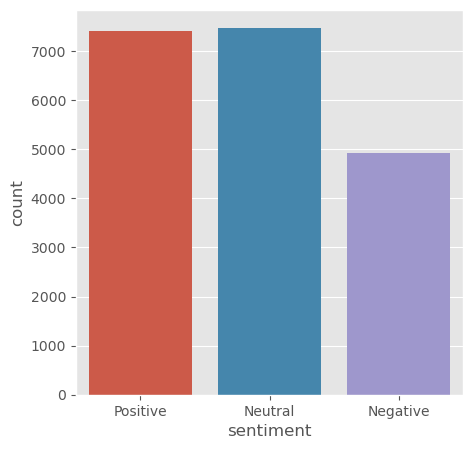

In [30]:
#Now visualize a distribution data using a count plot

fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

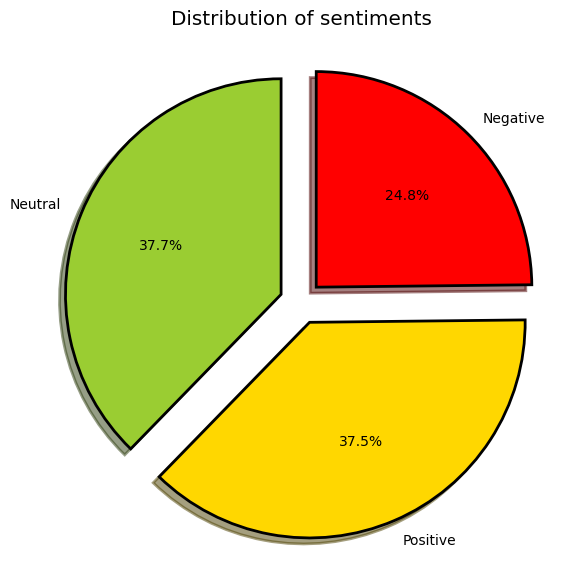

In [31]:
#visualize using pie chart

fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth': 2, 'edgecolor':'black'}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors, startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [32]:
 #top five of each sentiments

In [33]:
#top five of positive sentiment

pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,text,polarity,sentiment
849,excellent news return sanity parisclimateagree...,1.0,Positive
7867,projectlincoln oh wonderful lincoln project pl...,1.0,Positive
21278,starkeystardust theres list trump decisions bi...,1.0,Positive
15228,parisclimateagreement best way start day one,1.0,Positive
20118,us rejoined paris climate agreement world heal...,1.0,Positive


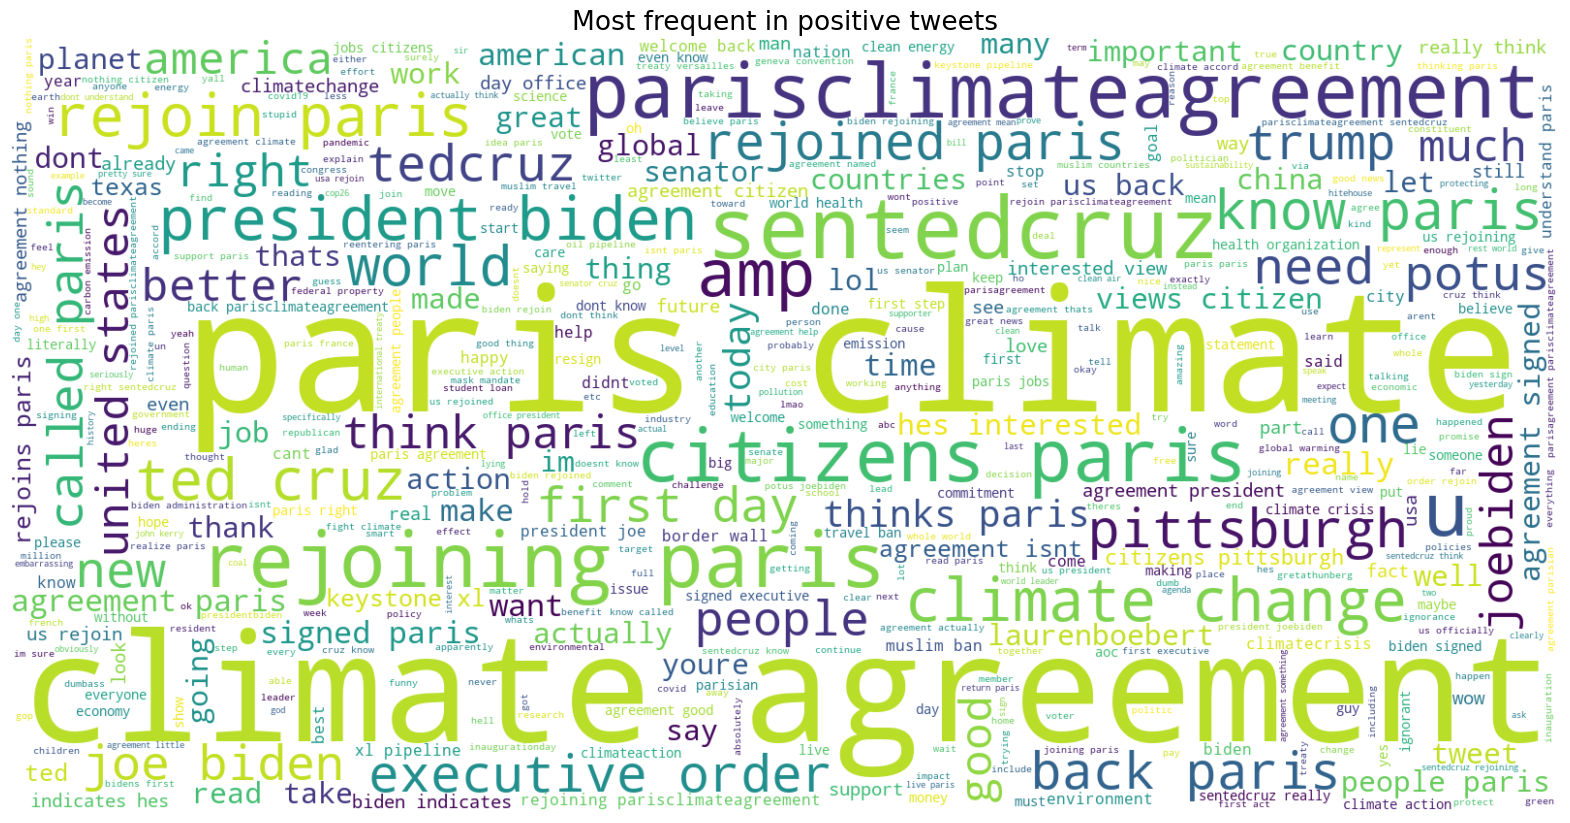

In [34]:
#use word cloud

text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(background_color='white', max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent in positive tweets', fontsize=19)
plt.show()

In [35]:
#top five of negative sentiment

neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,text,polarity,sentiment
10589,sentedcruz hi sorry bother facts know paris cl...,-9.251859e-18,Negative
13966,sentedcruz honestly think parisagreements anyt...,-1.387779e-17,Negative
11268,sentedcruz ashamed show public kind idiot pari...,-1.387779e-17,Negative
4799,donaldjtrumpjr trump left paris climate agreem...,-1.850372e-17,Negative
4533,gop moron lauren boebert urged stop eating pai...,-2.775558e-17,Negative


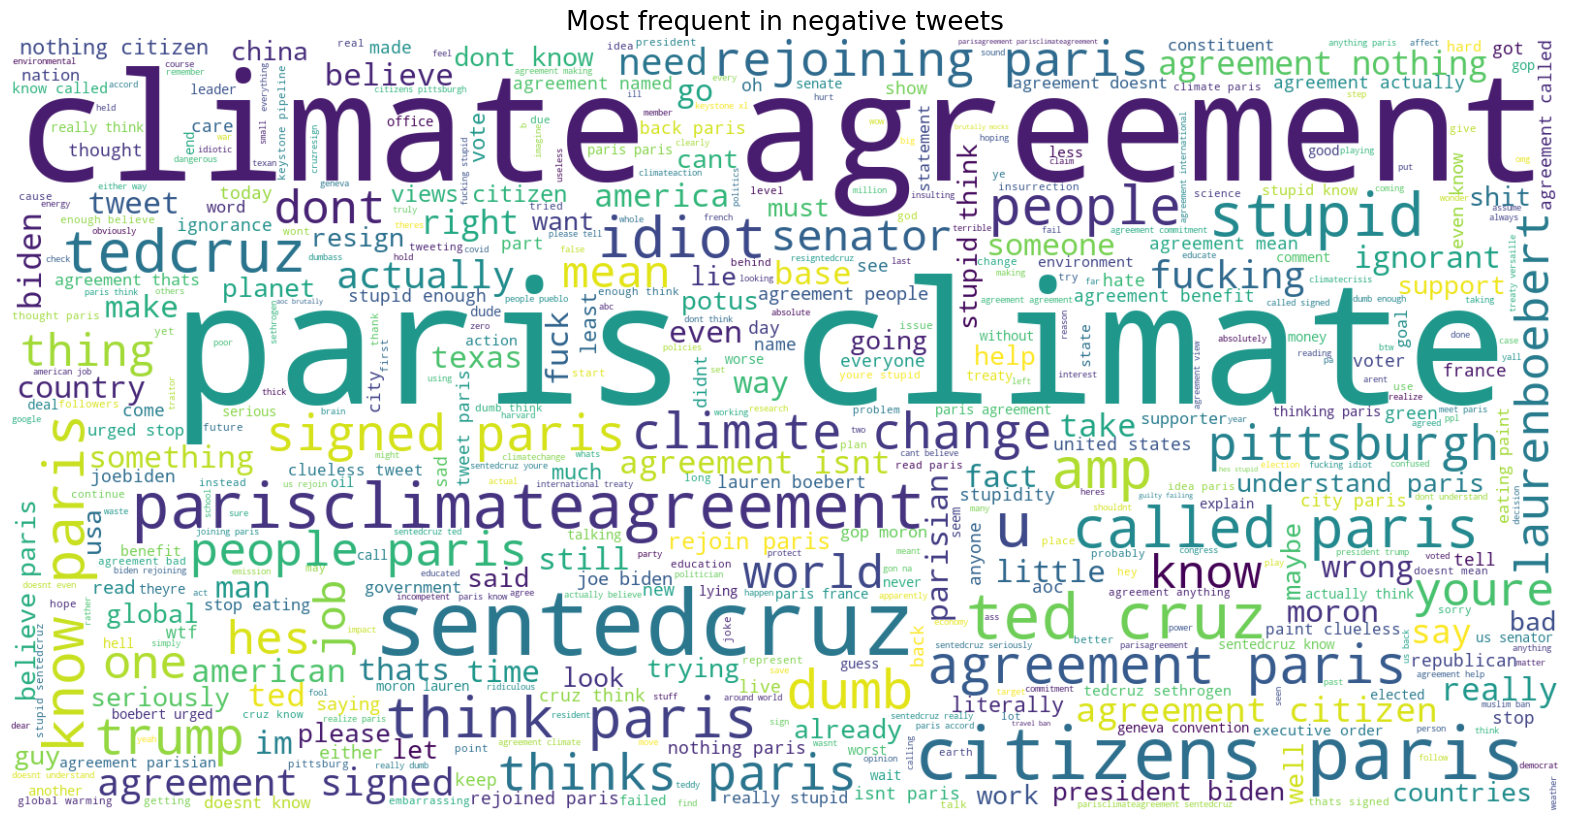

In [36]:
#use word cloud

text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(background_color='white', max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent in negative tweets', fontsize=19)
plt.show()

In [37]:
#top five of neutral sentiment

neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,text,polarity,sentiment
1,yes parisclimateagreement,0.0,Neutral
15199,cromwellstuff dems said stop trump getting 4 y...,0.0,Neutral
15218,back paris climate agreement yaaaaaasssssss th...,0.0,Neutral
15217,sentedcruz people pittsburgh want part paris c...,0.0,Neutral
15216,jaketapper whos going break paris climate agre...,0.0,Neutral


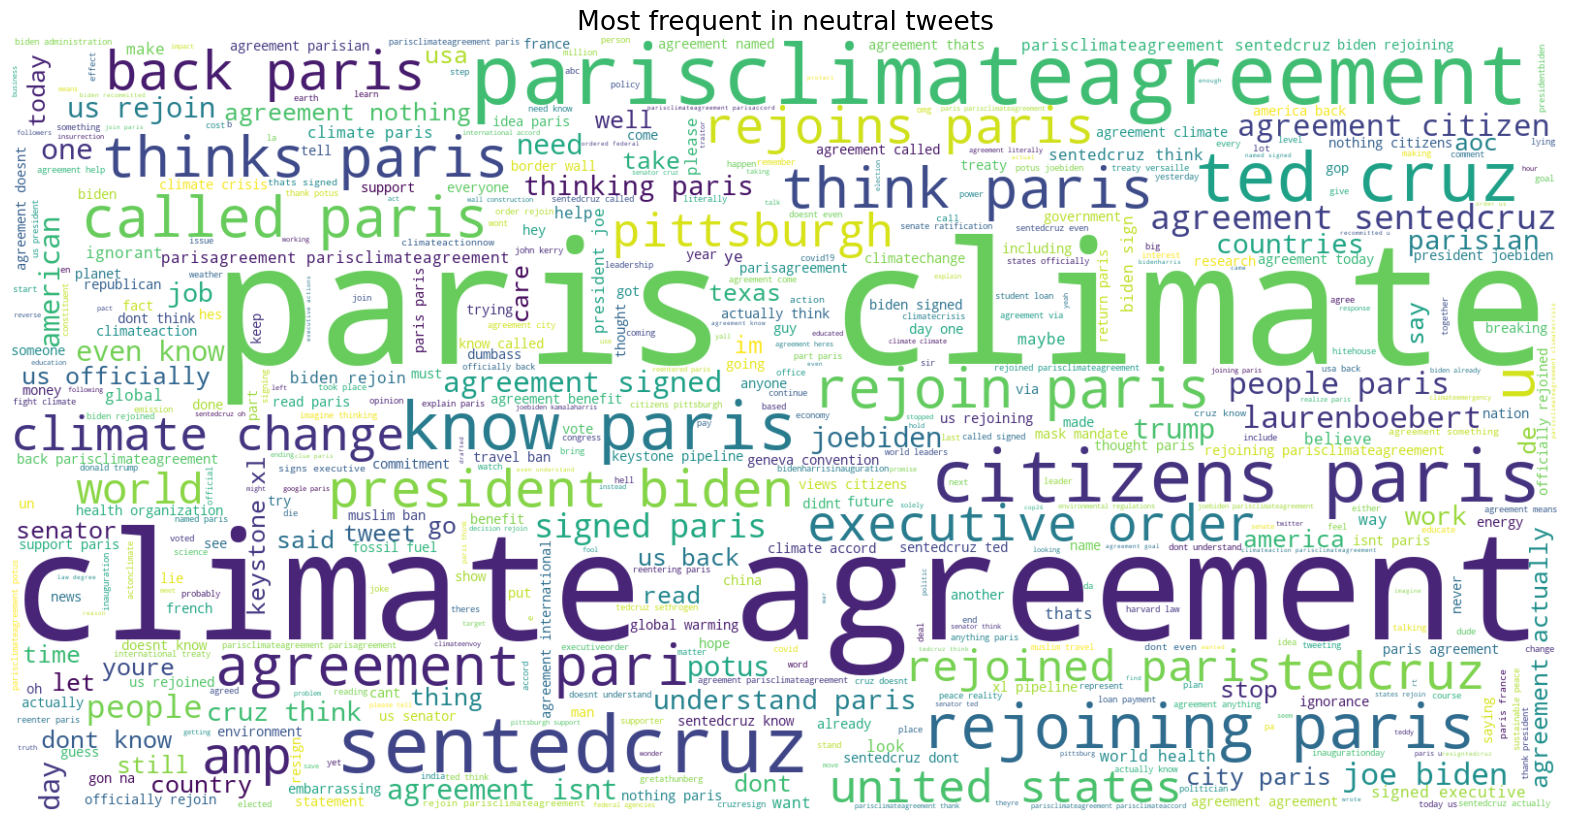

In [38]:
#use word cloud

text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(background_color='white', max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent in neutral tweets', fontsize=19)
plt.show()

In [39]:
#Next vectorize the data using Count Vectorizer

In [40]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [41]:
#Create bigram model

vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [42]:
#Get the number of features and print the first 20 features

feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:5000]))

Number of features: 170070

First 20 features:
 ['00', '00 chance', '000', '000 arbres', '000 two', '00000000001', '00000000001 research', '00000001', '00000001 degree', '002', '002 004', '003', '003 us', '004', '004 2016', '006gk', '006gk polibard', '01', '01 seconds', '01202017', '01202017 conflict', '01月23日2時07分台のニュースでした', '03', '03 open', '03 postponing', '0331', '0331 federal', '05', '05 degrees', '0930', '0930 trump', '098', '098 176', '0for2', '0for2 batting', '0sundance', '0sundance fcmfcs2019', '0sundance medbennett', '0xsr', '0xsr looks', '10', '10 2015', '10 banknote', '10 billion', '10 bucks', '10 cigs', '10 coal', '10 difference', '10 directed', '10 disturbing', '10 february', '10 fold', '10 gallon', '10 house', '10 memorandums', '10 months', '10 per', '10 seconds', '10 slides', '10 student', '10 supported', '10 today', '10 warmer', '10 year', '10 years', '10 yrs', '100', '100 addressing', '100 altruism', '100 antiscience', '100 benefit', '100 biden', '100 billion', '100 c

In [43]:
#now we get first 20 features from a bigram language model
#we have vectorized data, now proceed to build a model

In [44]:
#first separate data into x and y, then transfrom the x data

x = text_df['text']
y = text_df['sentiment']
x = vect.transform(x)

# Pembagian data

In [45]:
#Split the data into training and testing data
#Taking a test size of 20 percentage

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [46]:
#put in the size of the training and testing data

print("size of x_train:", (x_train.shape))
print("size of y_train:", (y_train.shape))
print("size of x_test:", (x_test.shape))
print("size of x_test:", (x_test.shape))

size of x_train: (15847, 170070)
size of y_train: (15847,)
size of x_test: (3962, 170070)
size of x_test: (3962, 170070)


In [47]:
import warnings
warnings.simplefilter(action='ignore')

# Tuning Hyperparameter

In [48]:
#train the data on a logisctic regression model
logreg = LogisticRegression()

#fit the x, y train on the logistic regression model
logreg.fit(x_train, y_train)

#predict the value for the given test data
logreg_pred = logreg.predict(x_test)

#calculate the accuracy for a model
logreg_acc = accuracy_score(logreg_pred, y_test)

#print the accuracy
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 85.97%


In [49]:
#print the confusion matrix and the classification report

print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 730  146  126]
 [  20 1477   41]
 [  50  173 1199]]


              precision    recall  f1-score   support

    Negative       0.91      0.73      0.81      1002
     Neutral       0.82      0.96      0.89      1538
    Positive       0.88      0.84      0.86      1422

    accuracy                           0.86      3962
   macro avg       0.87      0.84      0.85      3962
weighted avg       0.87      0.86      0.86      3962



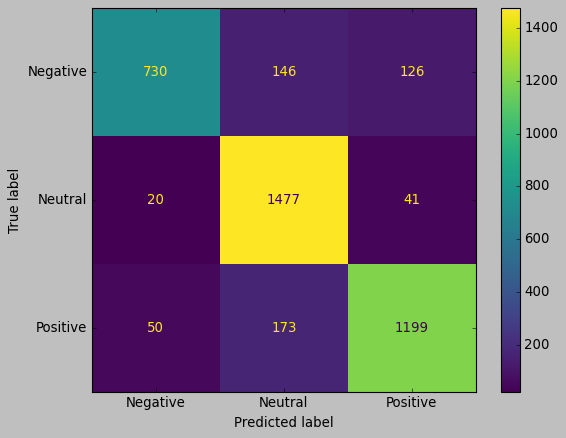

In [50]:
#another way to visualize a confusion matrix, namely using confusion matrix display

style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [51]:
#let's see how the accuracy of the model changes when you perform hyperparameter tuning
#hyper parameters are model parameters whose value control the learning rate of the algorithm,
#so by tweaking the typerparameters, we can change the performance of the machine learning model
#there are different methods for perform hyperparameter tuning
#this project will use grid search cv to perform hyperparameter tuning

In [52]:
#first import the GridSearchCV

from sklearn.model_selection import GridSearchCV

In [53]:
#perform hyperparameter tuning on the c parameter
#set a couple of c parameter values
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}

#define the grid search cv along with the classifier
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [54]:
#put the best parameters
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [55]:
#print the value for the given x_test

y_pred = grid.predict(x_test)

In [56]:
#calculate the model accuracy to see if there  is any change
logreg_acc = accuracy_score(y_pred, y_test)

#print accuracy score
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 87.03%


In [57]:
#as we can see, there's a slight improvement in the model accuracy

In [58]:
#now put in the confusion matrix and a classification report

print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 750  132  120]
 [  20 1481   37]
 [  52  153 1217]]


              precision    recall  f1-score   support

    Negative       0.91      0.75      0.82      1002
     Neutral       0.84      0.96      0.90      1538
    Positive       0.89      0.86      0.87      1422

    accuracy                           0.87      3962
   macro avg       0.88      0.86      0.86      3962
weighted avg       0.87      0.87      0.87      3962



In [59]:
#this the updated confusion matrix and the classficiation report

In [60]:
#run the model on one more algorithm, the Support Vector Machine
#let's import the support vector classifier
from sklearn.svm import LinearSVC

In [61]:
#load the classifier and fit the data on this model
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [62]:
#predict the values for a given test data
svc_pred = SVCmodel.predict(x_test)

#calculate the accuracy
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 88.04%


In [63]:
#svm gave a better accuracy than the logistic regression model
#let's put in the confusion matrix and classification report

print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 769  118  115]
 [  15 1495   28]
 [  48  150 1224]]


              precision    recall  f1-score   support

    Negative       0.92      0.77      0.84      1002
     Neutral       0.85      0.97      0.91      1538
    Positive       0.90      0.86      0.88      1422

    accuracy                           0.88      3962
   macro avg       0.89      0.87      0.87      3962
weighted avg       0.88      0.88      0.88      3962



In [64]:
#similiarly let's perform hyperparameter tuning for the svm model
#define the parameters for the svm model

grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["Linear", "poly", "rbf", "sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01, 1]
}

#define the grid search just we did for the logistic regression model
grid = GridSearchCV(SVCmodel, param_grid)

#fill the data
grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [65]:
#put the best parameter
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 10}


In [66]:
#predict the value the given x_test
y_pred = grid.predict(x_test)

In [67]:
#calculate the model accuracy to see if there is any change
logreg_acc = accuracy_score(y_pred, y_test)

#print the accuracy
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 88.01%


In [68]:
#print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 772  117  113]
 [  15 1493   30]
 [  49  151 1222]]


              precision    recall  f1-score   support

    Negative       0.92      0.77      0.84      1002
     Neutral       0.85      0.97      0.91      1538
    Positive       0.90      0.86      0.88      1422

    accuracy                           0.88      3962
   macro avg       0.89      0.87      0.87      3962
weighted avg       0.88      0.88      0.88      3962



In [69]:
#compare  all the model accuracies, we can see that the hyper parameter svm and tuned svm model gives the best mode accuracy